## Iris Flower Classifiction

This notebook is dedicated to scrutinizing the machine learning algorithms employed in the iris dataset. Its primary goal is to determine the most effective algorithm and assess its accuracy. Through a combination of exploratory data analysis and the application of various machine learning models, we aim to gain valuable insights into our dataset's characteristics and the performance of different algorithms.

Your feedback and insights are highly appreciated as we embark on this journey of optimizing our machine learning models.

### 1. About the Dataset

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

### 2. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Quick Data Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### 3.1 Checking missing values

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Well!! We have no missing data

In [5]:
df = df.drop('Id', axis=1)

#### 3.2 Dimension of the Dataset

In [6]:
print(f"The dimmension of Dataset: {df.shape}")

The dimmension of Dataset: (150, 5)


We can see we have a dataset with 150 observations and each observation has 6 columns.

Four of the columns are numeric attributes we can use to train machine learning models and the last columns is the label of a given flower.

#### 3.3 Statistical Summary (Current Status)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's interpret the above statistical description of our dataset:
- The description shows we have data with super low std (Standard Deviation)
    - the range of the SepalLengthCm is: **4.300000 - 7.900000**
    - the range of the SepalWidthCm is : **2.000000 - 4.400000**
    - the range of the PetalLengthCm is: **1.000000 - 6.900000**
    - the range of the PetalWidthCm is : **0.100000 - 2.500000**

#### 3.4 Distribution of each class

Since we predicting the Species of a given flower, let's examine what's the Species distribution for this dataset.

In [8]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 4. Explore Data Visualization

#### 4.1 Let's visualize the distribution

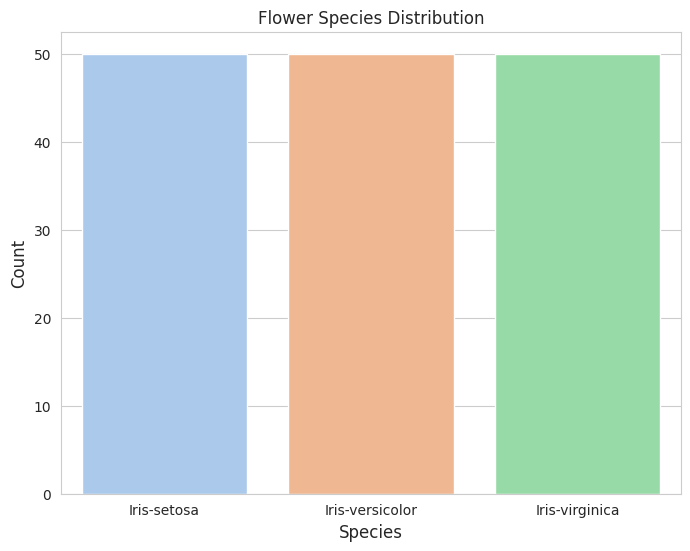

In [9]:
sns.set_style("whitegrid")

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=df, palette='pastel')  # corrected x parameter
plt.title('Flower Species Distribution')
plt.ylabel('Count', size=12)  # corrected ylabel
plt.xlabel('Species', size=12)  # corrected xlabel
plt.show()


From the above visualization and the summary, we can see each Species has equal distribution in the dataset. It's very "Ideal" in machine learning project.

#### 4.2 Box and Whisker Plot

We will use it see how the values are distributed in each attribute

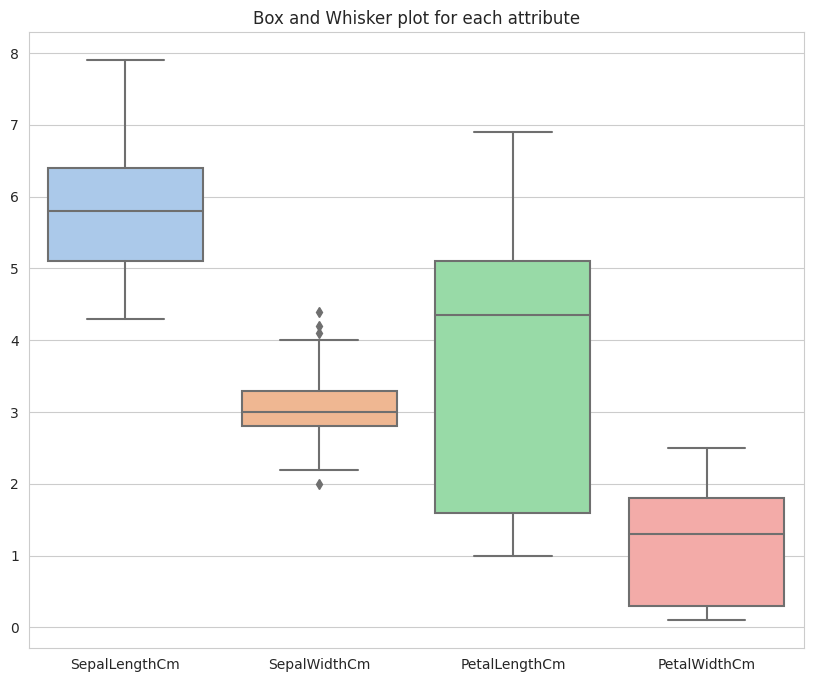

In [10]:
# Set the style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient="v", palette='pastel')
plt.title("Box and Whisker plot for each attribute")
plt.show()

#### 4.3 Histogram

Histogram is very important tool to help visualize the dataset's value distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

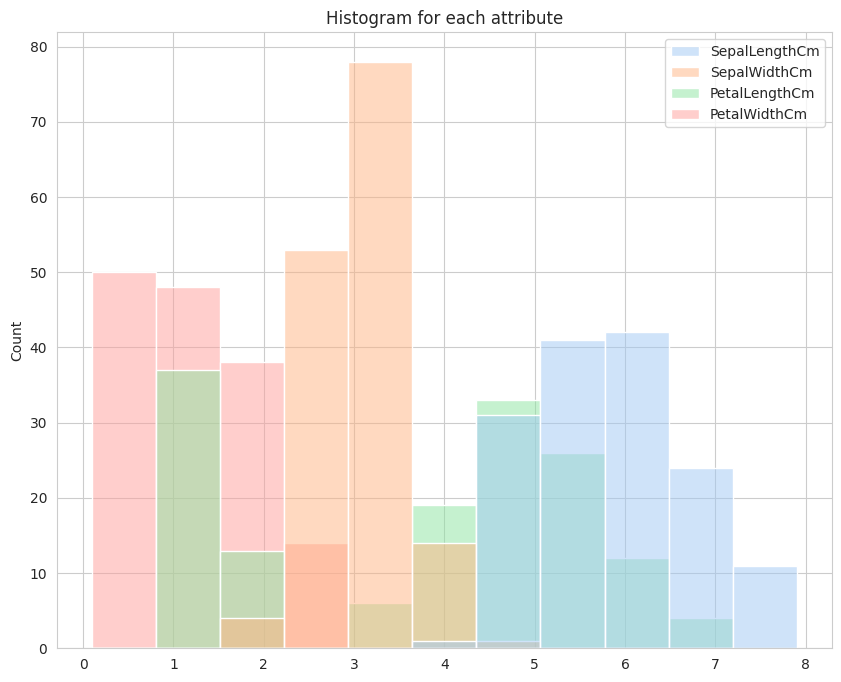

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.histplot(data=df, kde=False, palette='pastel')
plt.title('Histogram for each attribute')
plt.show()

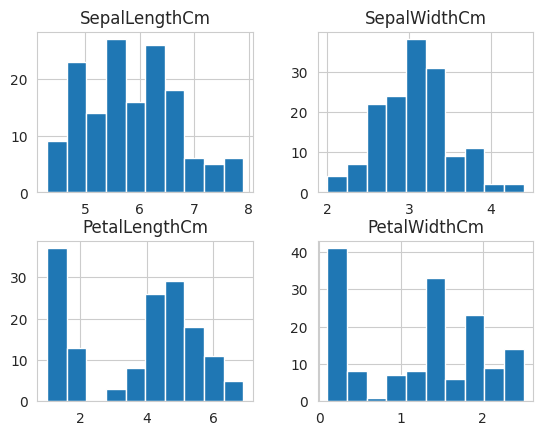

In [12]:
df.hist()
plt.show()

From the above Box and Whisker plot and histogram, they show 2 of the attributes has normal distribution. This is assumption for many machine learning algorithm. We can utilize the distribution to model our data.

#### 4.4 Multivariate Scatter Plot

Multivariate Scatter Plot helps us to visualize the pair-wise relationship in our dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

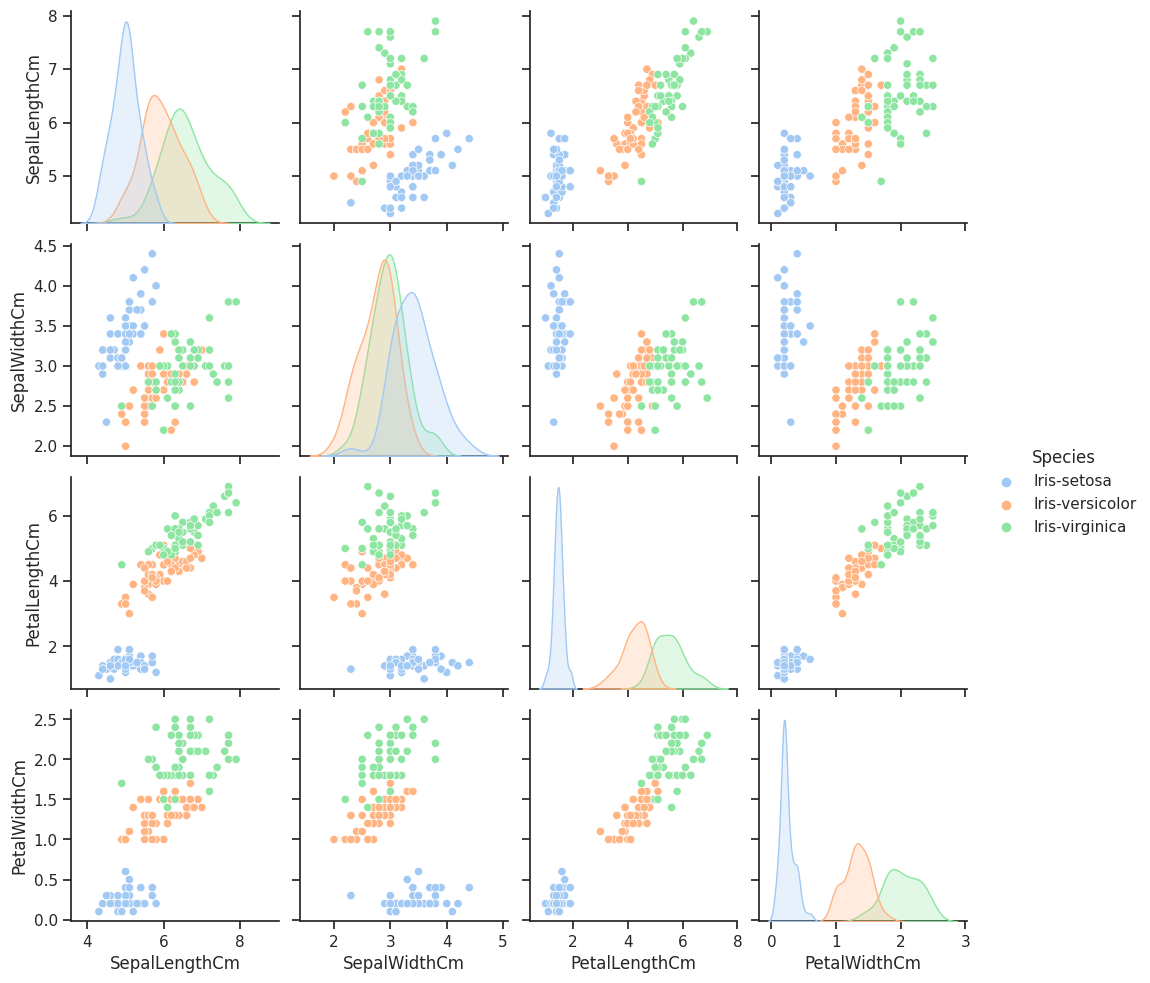

In [13]:
sns.set(style='ticks')
sns.pairplot(df, hue='Species', palette='pastel')

In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pair-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm.

### 5. Data Modeling

**Classification Problem:** Our goal is to predict the follow "Species" with given features: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, and `PetalWidthCm`.

#### 5.1 Train-Test Split

We will use Sklearn to split the arrays or matrices into random train and test subsets for training and testing machine learning model.

Our X will be the feature of the flowers and Y will be the label of the flowers.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# we will split data to 80% training data and 20% testing data
# with random seed of 10
X = df.drop(['Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [16]:
print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {y_train.shape}")
print(f"Y Test Shape: {y_test.shape}")

X Train Shape: (120, 4)
X Test Shape: (30, 4)
Y Train Shape: (120,)
Y Test Shape: (30,)


#### 5.2 Models Building

Let's build multiple machine learning models to evaluate how they will perform on our classification problem.

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

train the models and evaluate with 10-fold cross validation

In [18]:
# models
models = []

# Linear Model
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(("SVC", SVC()))

In [19]:
print(models)

[('LR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('CART', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier()), ('GNB', GaussianNB()), ('SVC', SVC())]


In [20]:
print("Model Accuracy: ")
all_results = []  # List to store all accuracy results

for name, model in models:
    # 10 fold cross validation to evaluate model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    res = f"{name}: accuracy={cv_results.mean():.4f} std={cv_results.std():.4f}"
    print(res)
    # Store the accuracy results
    for result in cv_results:
        all_results.append({'Model': name, 'Accuracy': result})

# Create a DataFrame from the accuracy results
df_accuracy = pd.DataFrame(all_results)

Model Accuracy: 
LR: accuracy=0.9583 std=0.0559
LDA: accuracy=0.9750 std=0.0382
CART: accuracy=0.9500 std=0.0764
KNN: accuracy=0.9833 std=0.0333
GNB: accuracy=0.9667 std=0.0408
SVC: accuracy=0.9833 std=0.0333


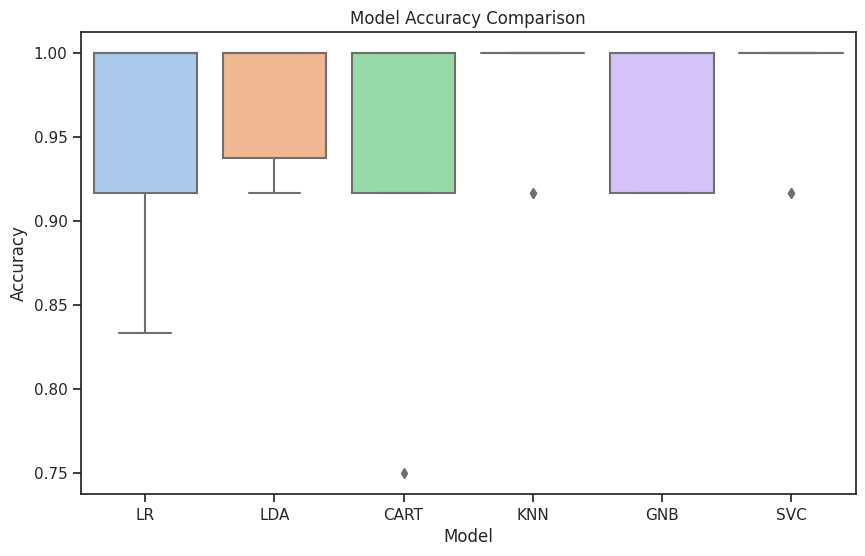

In [21]:
# create boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Model', y='Accuracy', data=df_accuracy, palette='pastel')
ax.set_title("Model Accuracy Comparison")
plt.show()

Test the KNN, GNP, and SVC models with test data and output their accuracy with confusion matrix together for selecting model

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("SVC", SVC()))

In [24]:
def test_model(model):
    model.fit(X_train, y_train)  # train the whole training set
    predictions = model.predict(X_test)  # predict on test set

    # Output model testing results
    print("Accuracy:", accuracy_score(y_test, predictions))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, predictions))

----------------
Testing KNN
Accuracy: 0.9


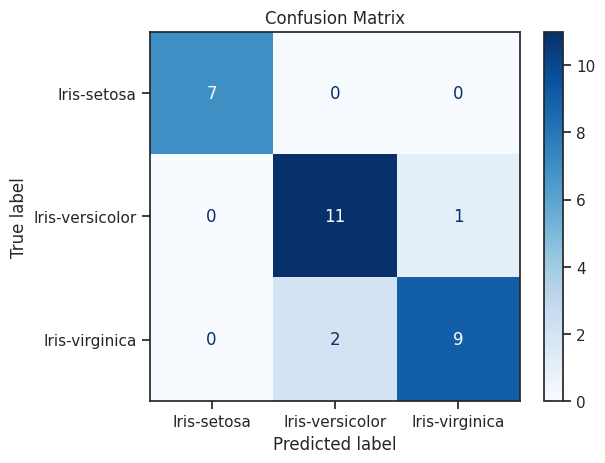

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing LDA
Accuracy: 0.9666666666666667


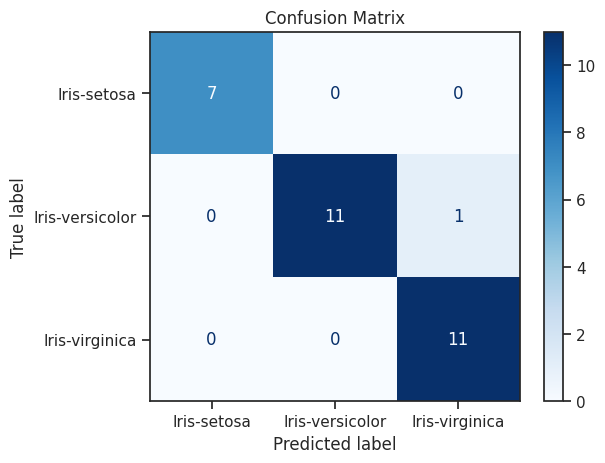

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

----------------
Testing SVC
Accuracy: 0.8666666666666667


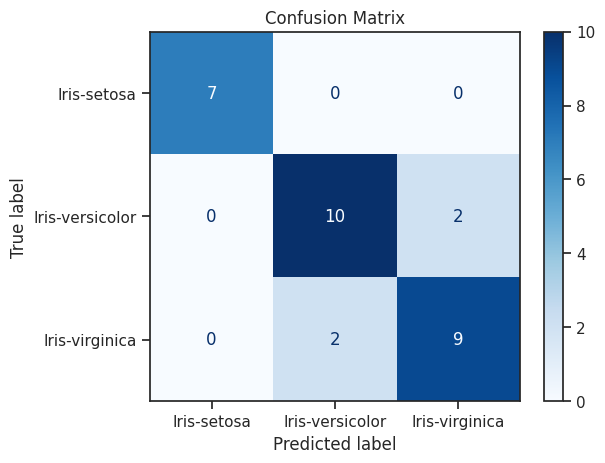

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [25]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

The highest testing accuracy is 0.97 from Linear Discriminant Analysis (LDA). <br>

The LDA's confustion matrix has the highest diagonal values indicated that LDA predicted the class type better than the other 2 models. <br>

From above confusion matrix and classification report, the LDA model is the best model for our classification problem.

### Conclusion

This kernel described and explored the classic Iris dataset with data visualizations. And we also experimented with 4 machine learning models: 2 linear and 4 non-linear models.
I examined the training results with 10-fold cross validation and chose LDA as the best model with testing confusion matrix output and classification report.

**fin.**